# Data representations for neural networks 
数据存储在多维Numpy数组中，也叫张量(tensor)，它是一个数据容器。  
矩阵：二维张；张量的维度(dimension)通常叫做轴(axis)。

### 2.2.1 Scalars (rank-0 tensors)
标量 0维张量

In [14]:
# int32值类型表示值介于 -2,147,483,648 到 +2,147,483,647 (2^31) 之间的有符号整数 
import numpy as np
x = np.array(12)
print(x.ndim)
x

0


array(12)

### 2.2.2 Vectors (rank-1 tensors)
向量 (1D张量)，只有一个轴

In [23]:
x = np.array([12, 3, 6, 14, 7])
print(x.ndim)
x

1


array([12,  3,  6, 14,  7])

这个向量有5个元素，所以被称为5D向量。5D向量不等同于5D张量(亦被称为5阶张量)，后者有5个轴

### 2.2.3 Matrices (rank-2 tensors)
矩阵(2D张量)

In [17]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 2.2.4 Rank-3 tensors and higher-rank tensors
3D张量与更高维张量

In [18]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [21]:
x = np.array([[[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]],
              [[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]]])
x.ndim
x.shape

(2, 3, 3, 5)

### 2.2.5 Key attributes

张量的三个关键属性:  
   1. 轴的个数(阶段)。3D张量有3个轴，矩阵两个轴，这也叫张量的ndim。  
   2. 形状。这是一个整数元祖，表示张量延每个轴的维度大小,这也叫张量的shape。前面4D张量为(2,3,3,5); 3D张量为(3,3,5); 矩阵为(3,5); 向量为(5,); 标量为()。规律为(Xn维度，Xn-1维度,Xn-2维度,...,X1维度)。  
   3. 数据类型(dtype)。包括:float32,uint8,float64,char(字符)。

In [24]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images.ndim

3

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images.dtype

dtype('uint8')

它是有8位整数组成的3D张量; 6000个28*28的矩阵组成的数组；每个矩阵代表一个灰度图像，元素取值范围为0～255。

#### Displaying the fourth digit

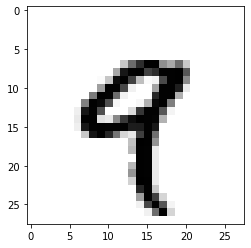

In [30]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [31]:
train_labels[4]

9

### 2.2.6 Manipulating tensors in NumPy
在Numpy中操作张量

In [33]:
train_images[10].shape #是一个28*28的灰度图像

(28, 28)

In [34]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100,:,:] # 等同
my_slice.shape

(90, 28, 28)

In [39]:
my_slice = train_images[10:100,0:28,0:28] # 等同，python是从0开始的
my_slice.shape

(90, 28, 28)

In [ ]:
#在所有图片中，选取14*14的区域
my_slice = train_images[:, 14:, 14:]
#在所有图片中，在图像中心选取14*14的区域
my_slice = train_images[:, 7:-7, 7:-7]

### 2.2.7 The notion of data batches
数据批量的概念

In [46]:
#深度学习中所有数据张量的第一个轴都是样本轴(sample axis)
# 这里将MNIST数据拆成批量为128的小批量
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [47]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
# 对于这种批量张量，第一个轴叫做批量轴

### 2.2.8 Real-world examples of data tensors¶


1. 向量数据：2D张量, shape = (samples, features) 
2. 时间序列数据或序列数据: 3D张量, shape = (samples, timesteps, features)  
3. 图像: 4D张量, shape = (samples, height, width, channels) or (samples, channels, height, width)  
4. 视频: 5D张量, shape = (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

### 2.2.9 Vector data
向量数据：2D张量, shape = (samples, features) 
第一轴是样本轴，第二个轴是特征轴。  
比如  
1. 人口统计数据，每个人包括年龄、邮编和收入信息，及三个值的向量。而整个数据集包括100,000个人，因此构成一个(100000,3)的2D张量。  
2. 文本数据集，每个文档表示每个单词在其中出现的次数(字典里饱含20,000个常见单词)。每个文档可以被编译成包含20,000个值的向量(每个值对应字典中每个单词的出现次数)，整个数据集包含500个文档，因此可以构成一个(500,20000)的2D张量。

### 2.2.10 Timeseries data or sequence data  
时间序列数据或序列数据: 3D张量, shape = (samples, timesteps, features)
一般，把时间轴设置为第二个轴。  
1. 股票价格数据集，每一分钟，我们都保存股票的当前价格，前一分钟价格的最高价和最低价，每天共有390分钟，一共保存250天，因此构成一个(250,390,3)的3D张量。  
2. 推文数据集，每条推文编译成280个字符组成的序列，每个字符又来自128个字符组成的字幕表，100万条推文可构成(1000000,280,128)。

### 2.2.11 Image data
图像: 4D张量, shape =   
(samples, height, width, channels) --TensorFlow  
or  
(samples, channels, height, width) --Theano  
图像通常具有三个维度: 高/宽/颜色深度。  
128张图像大小为256*256的灰度图像构成 (128,256,256,1)的张量。  
128张彩色图像构成 (128,256,256,3)的张量。


### 2.2.12 Video data
视频: 5D张量, shape = (samples, frames, height, width, channels) or (samples, frames, channels, height, width)  
一个每秒4帧，尺寸为144*256的60s彩色视频可构成 (4,240,144,256,3)